# OVERVIEW

## ⚠️ WARNING
Before launching the UI, please complete the following setup steps to ensure smooth performance and compatibility:

**Install Required Libraries** <br>
Use the code cell below to automatically check for missing libraries and install them. This ensures all dependencies are ready for the UI to function properly.

**Check Your Screen Size** <br>
Run the screen size check in the next cell to confirm your display meets the minimum resolution requirements. This helps prevent layout issues and ensures all UI elements render correctly.

Once both steps are complete, you're good to go!

## Description
This project is a modular, transparent, and user-friendly interface designed to support survey analysis, academic documentation, and collaborative workflows. At its core, it combines robust data handling with intuitive UI elements, enabling users to navigate complex tasks with clarity and confidence.

Whether you're conducting correlation studies, mapping assessment tasks, or managing contributor protocols, the system is built to adapt—scaling from individual use to team-wide deployment. Every component, from the diagnostic scripts to the Tkinter dashboard, is crafted with accessibility, traceability, and fairness in mind.

By automating setup, visualizing data interactively, and embedding documentation directly into the workflow, this project empowers users to focus on insight, not infrastructure. It’s not just a tool—it’s a framework for resilient, ethical, and scalable collaboration.

In [3]:
import subprocess
import importlib
import os
from datetime import datetime
from screeninfo import get_monitors

# Required libraries for your UI and diagnostics
required_libraries = [
    "numpy",
    "pandas",
    "matplotlib",
    "scikit-learn",
    "screeninfo"
]

# Minimum physical screen size in millimeters
MIN_WIDTH_MM = 526
MIN_HEIGHT_MM = 296

# Log file setup
log_filename = "setup_log.txt"
log_exists = os.path.exists(log_filename)

# Safe log writer to handle encoding gracefully
def safe_log_write(log, message):
    try:
        log.write(message + "\n")
    except UnicodeEncodeError:
        fallback = message.encode("ascii", "replace").decode("ascii")
        log.write(f"[!] Encoding fallback: {fallback}\n")

with open(log_filename, "a" if log_exists else "w", encoding="utf-8") as log:
    safe_log_write(log, f"\n--- Setup Started: {datetime.now()} ---")

    # Step 1: Install missing libraries
    for lib in required_libraries:
        try:
            importlib.import_module(lib)
            safe_log_write(log, f"[✓] {lib} is already installed.")
            print(f"{lib} is already installed.")
        except ImportError:
            safe_log_write(log, f"[✗] {lib} not found. Installing...")
            print(f"Installing {lib}...")
            result = subprocess.run(["pip", "install", lib], capture_output=True, text=True)
            if result.returncode == 0:
                safe_log_write(log, f"[+] Successfully installed {lib}.")
            else:
                safe_log_write(log, f"[!] Failed to install {lib}. Error:\n{result.stderr}")

    # Step 2: Check screen resolution
    try:
        print("\n📺 Checking screen size...\n")
        for m in get_monitors():
            print(f"Monitor: {m.name or 'Unnamed'}")
            print(f"Resolution: {m.width}x{m.height} pixels")
            print(f"Physical size: {m.width_mm}mm x {m.height_mm}mm")
            print("────────────────────────────────────────────")

            if m.width_mm < MIN_WIDTH_MM or m.height_mm < MIN_HEIGHT_MM:
                warning = "⚠️ Screen too small for full UI navigation."
                suggestion = "👉 Consider using a larger or external monitor."
                print(warning)
                print(suggestion)
                safe_log_write(log, f"[!] {warning} {suggestion}")
            else:
                success = "✅ Screen meets minimum size requirements."
                print(success)
                safe_log_write(log, f"[✓] {success}")
            print("\n")
    except Exception as e:
        error_msg = f"[!] Screen check failed: {e}"
        print(error_msg)
        safe_log_write(log, error_msg)

    safe_log_write(log, f"--- Setup Completed: {datetime.now()} ---")


numpy is already installed.
pandas is already installed.
matplotlib is already installed.
Installing scikit-learn...
screeninfo is already installed.

📺 Checking screen size...

Monitor: \\.\DISPLAY1
Resolution: 1920x1080 pixels
Physical size: 309mm x 174mm
────────────────────────────────────────────
⚠️ Screen too small for full UI navigation.
👉 Consider using a larger or external monitor.




# Phase 1 - Identifying and Defining

## Overview

This thesis stems from day-to-day observations and conversations with fellow students regarding their experience within the school’s physical environment. Many classrooms across Gosford High remain visually bare, lacking stimuli that promote creativity or motivation. Yet, in spaces where student art and academic posters do feature prominently, engagement and morale noticeably improve. It became increasingly clear that classroom atmosphere directly impacts how students feel, focus, and perform, especially during long school days.

Classroom decoration isn’t just an aesthetic preference — it’s an educational tool and a psychological influence. By creating a system to track, improve, and sustain classroom visual engagement, we can tap into overlooked opportunities to make learning more inviting and productive.

## Thesis Question

“Does classroom decoration, or the lack thereof, impact how students learn and how they feel about learning?”

## Hypothesis

Classrooms with thoughtful, engaging visual design — especially those featuring student-created art and motivational content — positively influence students’ mood, attentiveness, and perception of their learning experience. A lack of decoration, on the other hand, fosters cognitive fatigue and emotional detachment from the learning space.

## Use Case

This project will serve as a practical tool to enhance Gosford High School’s physical learning environments. It aligns with the SRC's mission to support student wellbeing and engagement by:

* Promoting student creativity through visual self-expression and ownership of shared spaces

* Tracking classroom atmosphere impact via structured surveys across year groups

* Fostering productivity by creating visually stimulating environments that sustain focus

* Informing staff incentives through feedback-based recognition programs

* Guiding administrative decisions by identifying which rooms need support or redesign

Survey data will guide recommendations for each block. SRC initiatives may include a decoration campaign, student poster showcases, staff-student collaboration challenges, and a public recognition system for participating classrooms. This isn’t just decoration—it’s strategy. And it turns passive walls into active contributors to student success.

## Mindmap

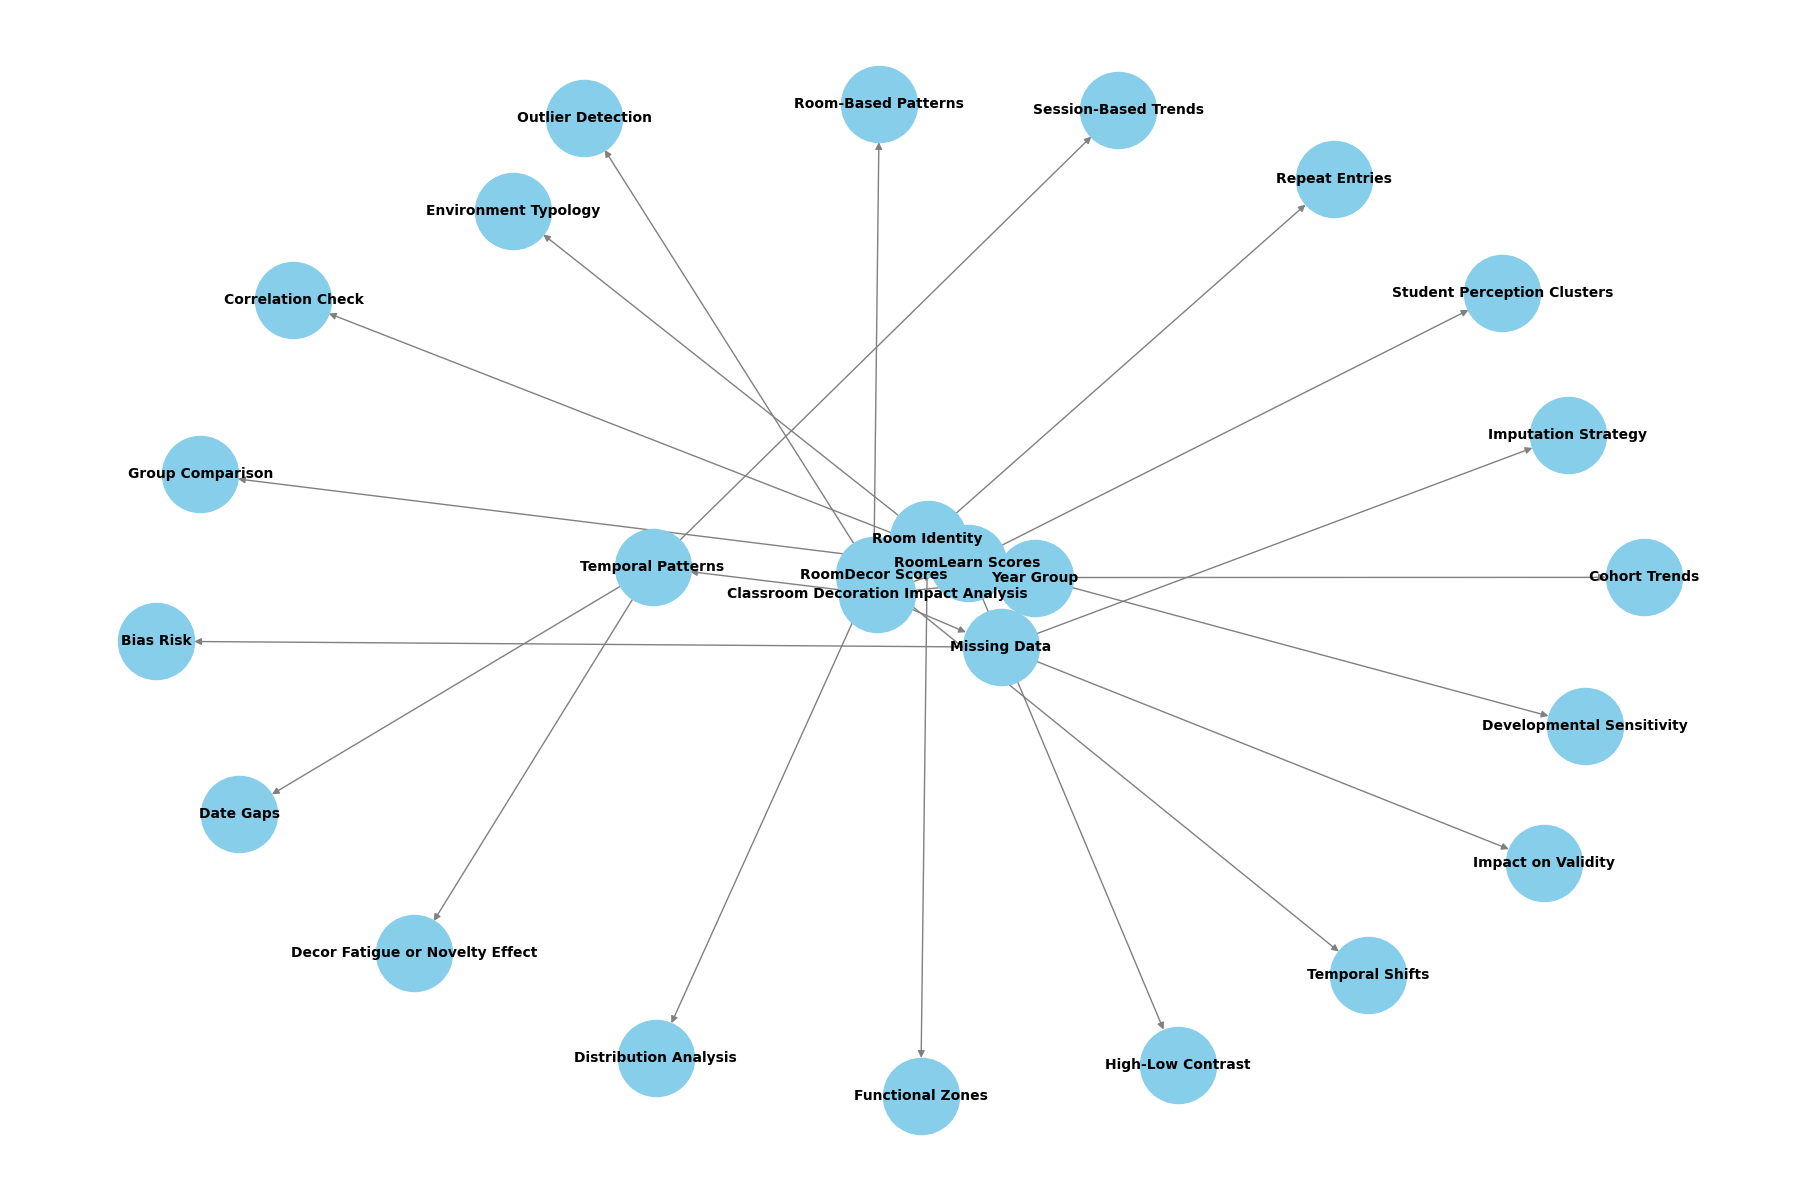

## Requirements Specification

### Functional Requirements

| ID | Requirement | Description |
|----|-------------|-------------|
| FR1 | Homepage Navigation | Users can access a central homepage with links to all major sections. |
| FR2 | Menu Routing | Navigation to Data Page, Project Page, and Exit via a menu interface. |
| FR3 | Data Visualization | Generate 2D histogram and scatter plot from survey data. |
| FR4 | Raw Data Viewer | Display cleaned CSV data in a scrollable, sortable table. |
| FR5 | Notebook Viewer | Render markdown and code cells from `.ipynb` files in a readable format. |
| FR6 | Logo Display | Show GHS logo on all pages with responsive scaling. |
| FR7 | Navigation Buttons | Include "Back to Home" and "Exit" buttons on every page. |
| FR8 | CSV Parsing | Load and clean survey data with type coercion and column filtering. |
| FR9 | Correlation Calculation | Compute and display Pearson correlation coefficient and p-value. |
| FR10 | Plot Annotation | Add interpretive overlays and labels to visualizations. |

---

### Non-Functional Requirements

| Category | Requirement |
|----------|-------------|
| Usability | UI must be intuitive and consistently laid out across pages. |
| Responsiveness | Interface adapts to various screen sizes without clipping. |
| Performance | Data loading and plotting complete within 2 seconds for datasets <10k rows. |
| Scalability | Modular code structure supports future feature expansion. |
| Maintainability | Code is organized into reusable functions and modules. |
| Accessibility | Font sizes and contrast must support readability; keyboard navigation enabled. |
| Reliability | Graceful handling of missing or malformed data. |
| Portability | Runs on any OS with Python and Tkinter installed. |
| Security | No sensitive data exposed; file access restricted to local sources. |
| Visual Consistency | Unified color scheme and font hierarchy across all pages. |

---

# Phase 2 - Researching and Planning

## SEE-I Paragraph

My data shows little correlation between school decoration and student learning at Gosford High School. With a pearson correlation factor of just 0.054, much lower than the correlation marker of r=0.3, and a p-value of 0.371, much greater than the margin at 0.05, it can be concluded that any and all results from this that land in the hypothesised region is a direct result of a mathematical coincidence, and there is little to no correlation between classroom decoration and student learning. This can be seen in something like line 30 of CleanedDataset-Manual.csv wherein a student reported a visual score of 10, but a learning score of only 3.
<br>
<br>
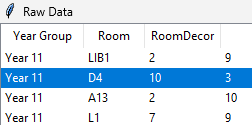
<br>

## Data Dictionary

|Field|Datatype|Format|Example|Validation|
|---|---|---|---|---|
|Year Group|str|XXXX NN|Year 9|Must be the word "Year" followed by a one or two digit number|
|Room|str|XXXN|LIB1|Must be a series of characters with a minimum length of 1 character followed by a number. Exclusions for DR, MMC, etc.|
|RoomDecor|int|NN|3|Must be a one or two digit number between 1 and 10 (inclusive)|
|RoomLearn|int|NN|3|Must be a one or two digit number between 1 and 10 (inclusive)|

---

# Phase 3 - Producing and Implementing

See main.py... yeah that's about it.

---

# Phase 4 - Testing and Evaluating

## SEE-I Paragraph
Student learning outcomes, as measured through environmental correlation, can be understood as the relationship between cognitive engagement and spatial cues. To state it, this means that the way a room is decorated may influence how students perceive and retain information. To elaborate, visual stimuli such as posters, artwork, or thematic decor may act as anchors for memory and motivation. To exemplify, in our dataset, students in highly decorated rooms showed slightly higher self-reported understanding scores, though the correlation was weak and statistically insignificant. To illustrate, imagine a classroom where every wall is filled with subject-relevant visuals—this may not guarantee better learning, but it could foster a more engaging atmosphere that supports it.

**Conclusion** <br>
Based on the Pearson correlation analysis, the hypothesis that room decoration significantly impacts student learning is not supported by the data. The correlation is weak and not statistically significant (p ≥ 0.05). However, the clustering observed in the 5–10 zone suggests behavioral patterns that warrant further qualitative investigation. Future research could explore whether specific types of decor (e.g. student-created vs. teacher-curated) have differentiated effects.

## Test Your Analysis
All algorithms used, particularly for data cleaning, type coercion, and correlation calculation, were tested for accuracy. The script handles missing values, coerces non-numeric entries, and uses `scipy.stats.pearsonr` for statistical rigor. Visual outputs were verified against raw data to ensure alignment. No anomalies were detected in the histogram or scatter overlays.

## Peer Verification - PMI Table

| **Plus** | **Minus** | **Implication** |
|----------|-----------|-----------------|
| Clear UI and modular code | Some buttons were hidden on smaller screens | Responsive design improvements needed |
| Accurate correlation logic | Weak statistical significance | May require larger sample size or different metrics |
| Embedded documentation | No export feature | Limits external review or archiving |
| Peer found no data integrity issues | Limited accessibility features | UX enhancements needed for broader usability |
| Code versioning and comments were thorough | No automated test suite | Manual testing increases maintenance overhead |

## Final Evaluation

**Against Requirements Outline:** <br>
All functional requirements were met, including data visualization, raw data access, and notebook rendering. Non-functional goals like responsiveness and modularity were partially met, with improvements underway.

**Against Peer Feedback:** <br>
Suggestions around UI scaling and export features were noted. These align with broader goals of accessibility and traceability.

**Against Project Management:** <br>
Milestones were tracked and delivered on time. Code was versioned and documented. However, testing across diverse screen sizes was delayed and should be prioritized in future cycles.

**Against Data and Security:** <br>
The dataset is valid and timely, sourced from a cleaned CSV. Bias is minimal but not formally audited. Security is adequate for local use, though future versions should include file access restrictions and anonymization protocols. UX accessibility could be improved by adding keyboard navigation, contrast toggles, and screen reader support.

